In [40]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Red ratio by different policies - Random source nodes.

In [41]:
# Different policies.
policies = ['Node2vec', 'ResourceAllocation', 'PreferencialAttachment', 'JaccardCoefficient', 'Gain', 'ExpGain', 
           'AdamicAdar', 'Random']

In [42]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('redRatioBy%sRandomSources.txt' %policy)

<IPython.core.display.Javascript object>


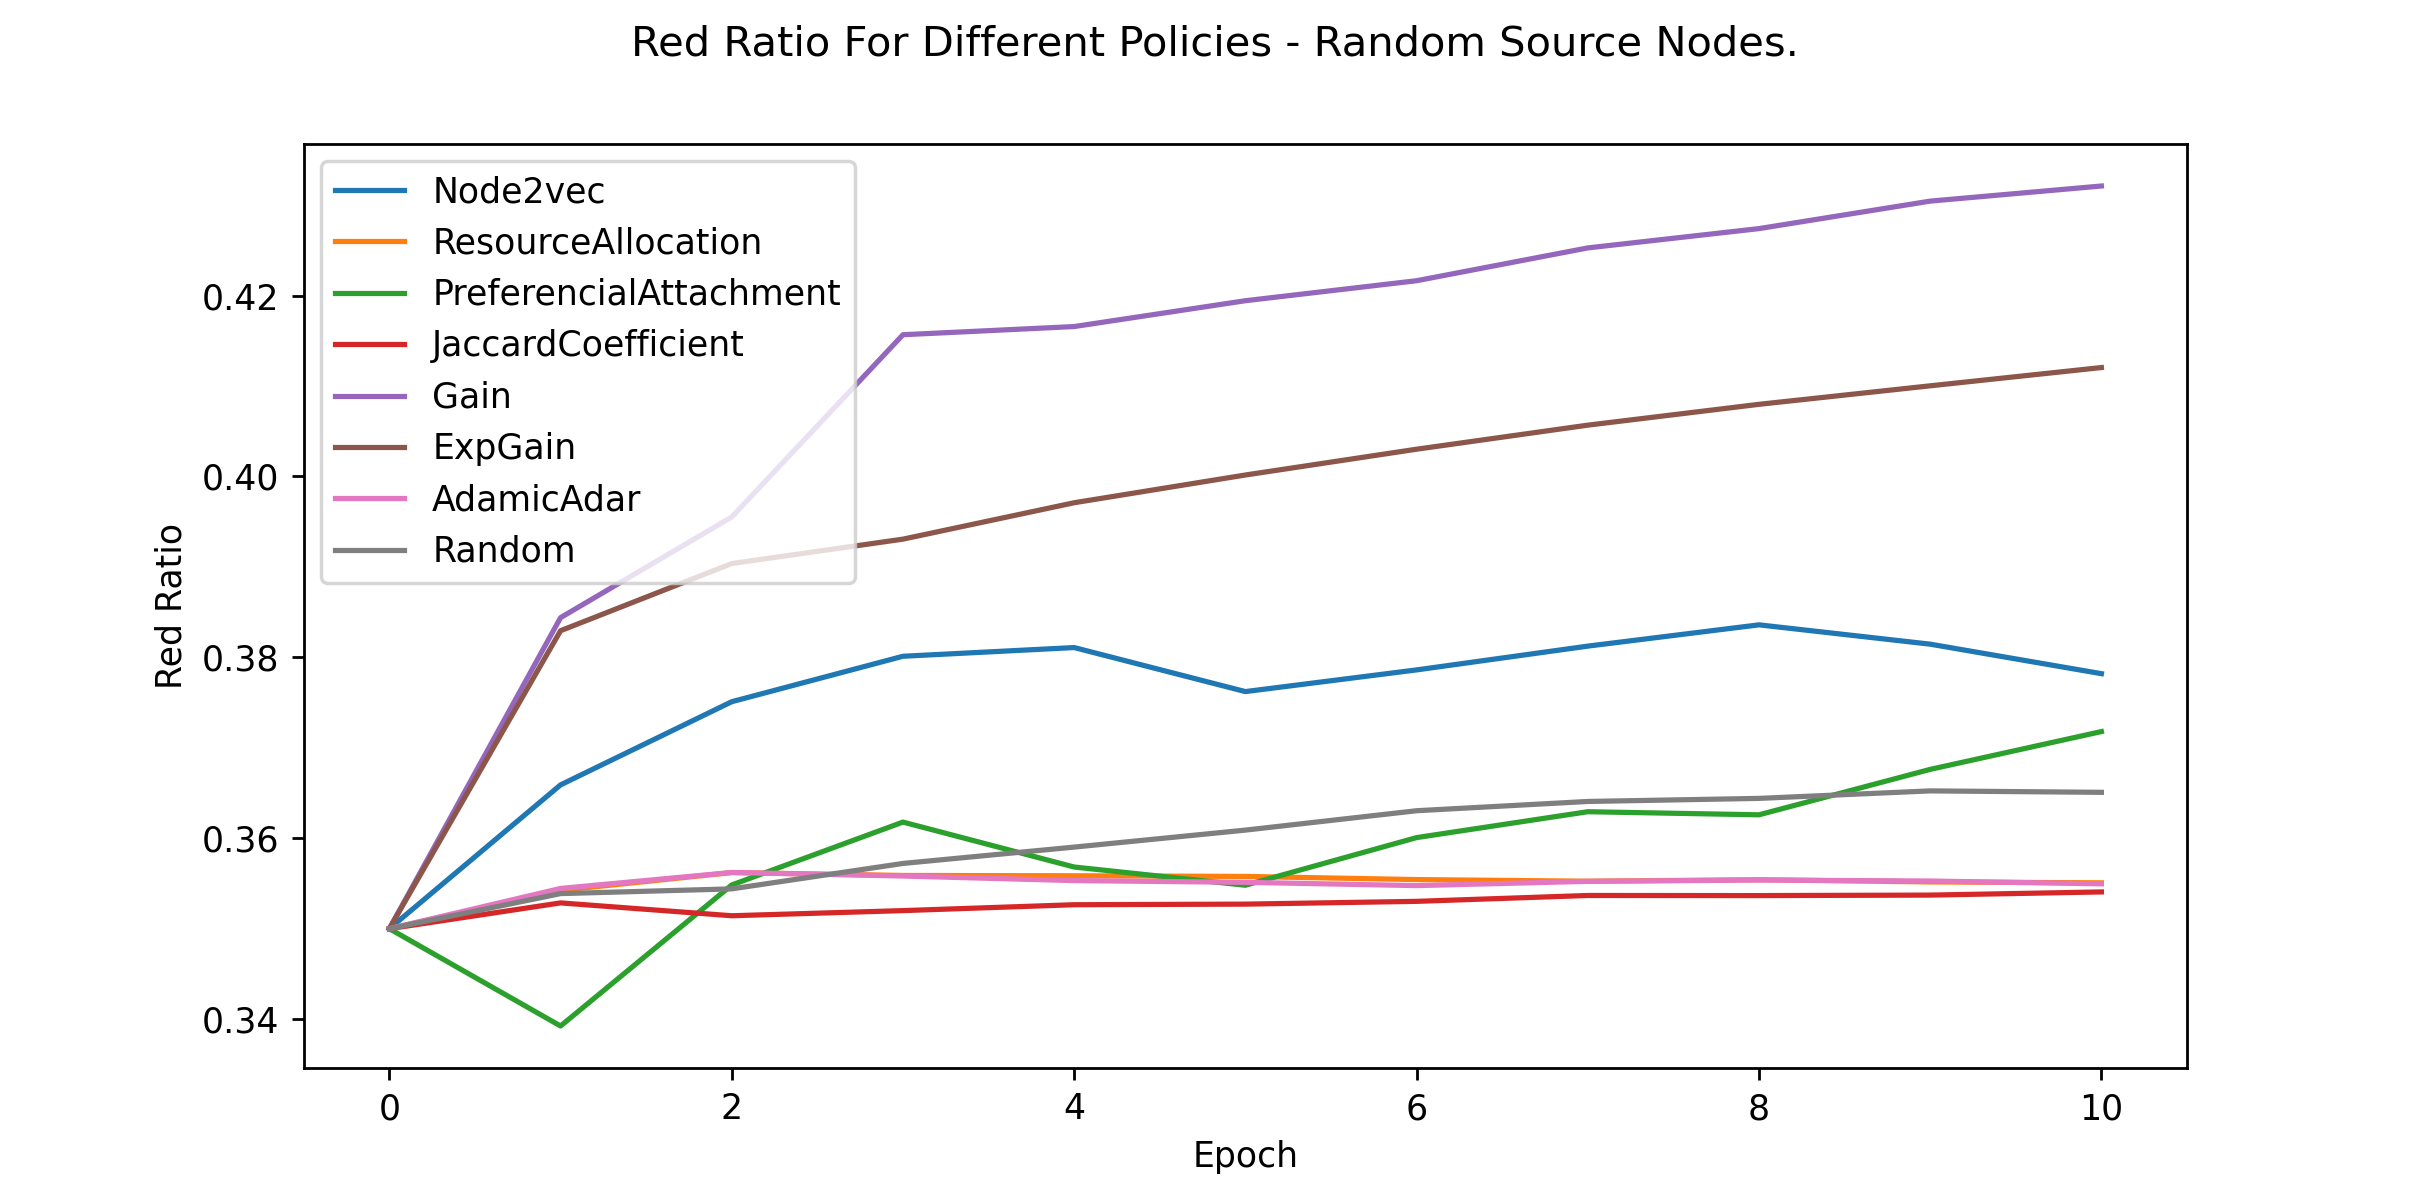

In [43]:
fig = plt.figure()
fig.suptitle('Red Ratio For Different Policies - Random Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Red Ratio')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Red ratio by different policies - Best red source nodes.

In [44]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('redRatioBy%sRedSources.txt' %policy)

<IPython.core.display.Javascript object>


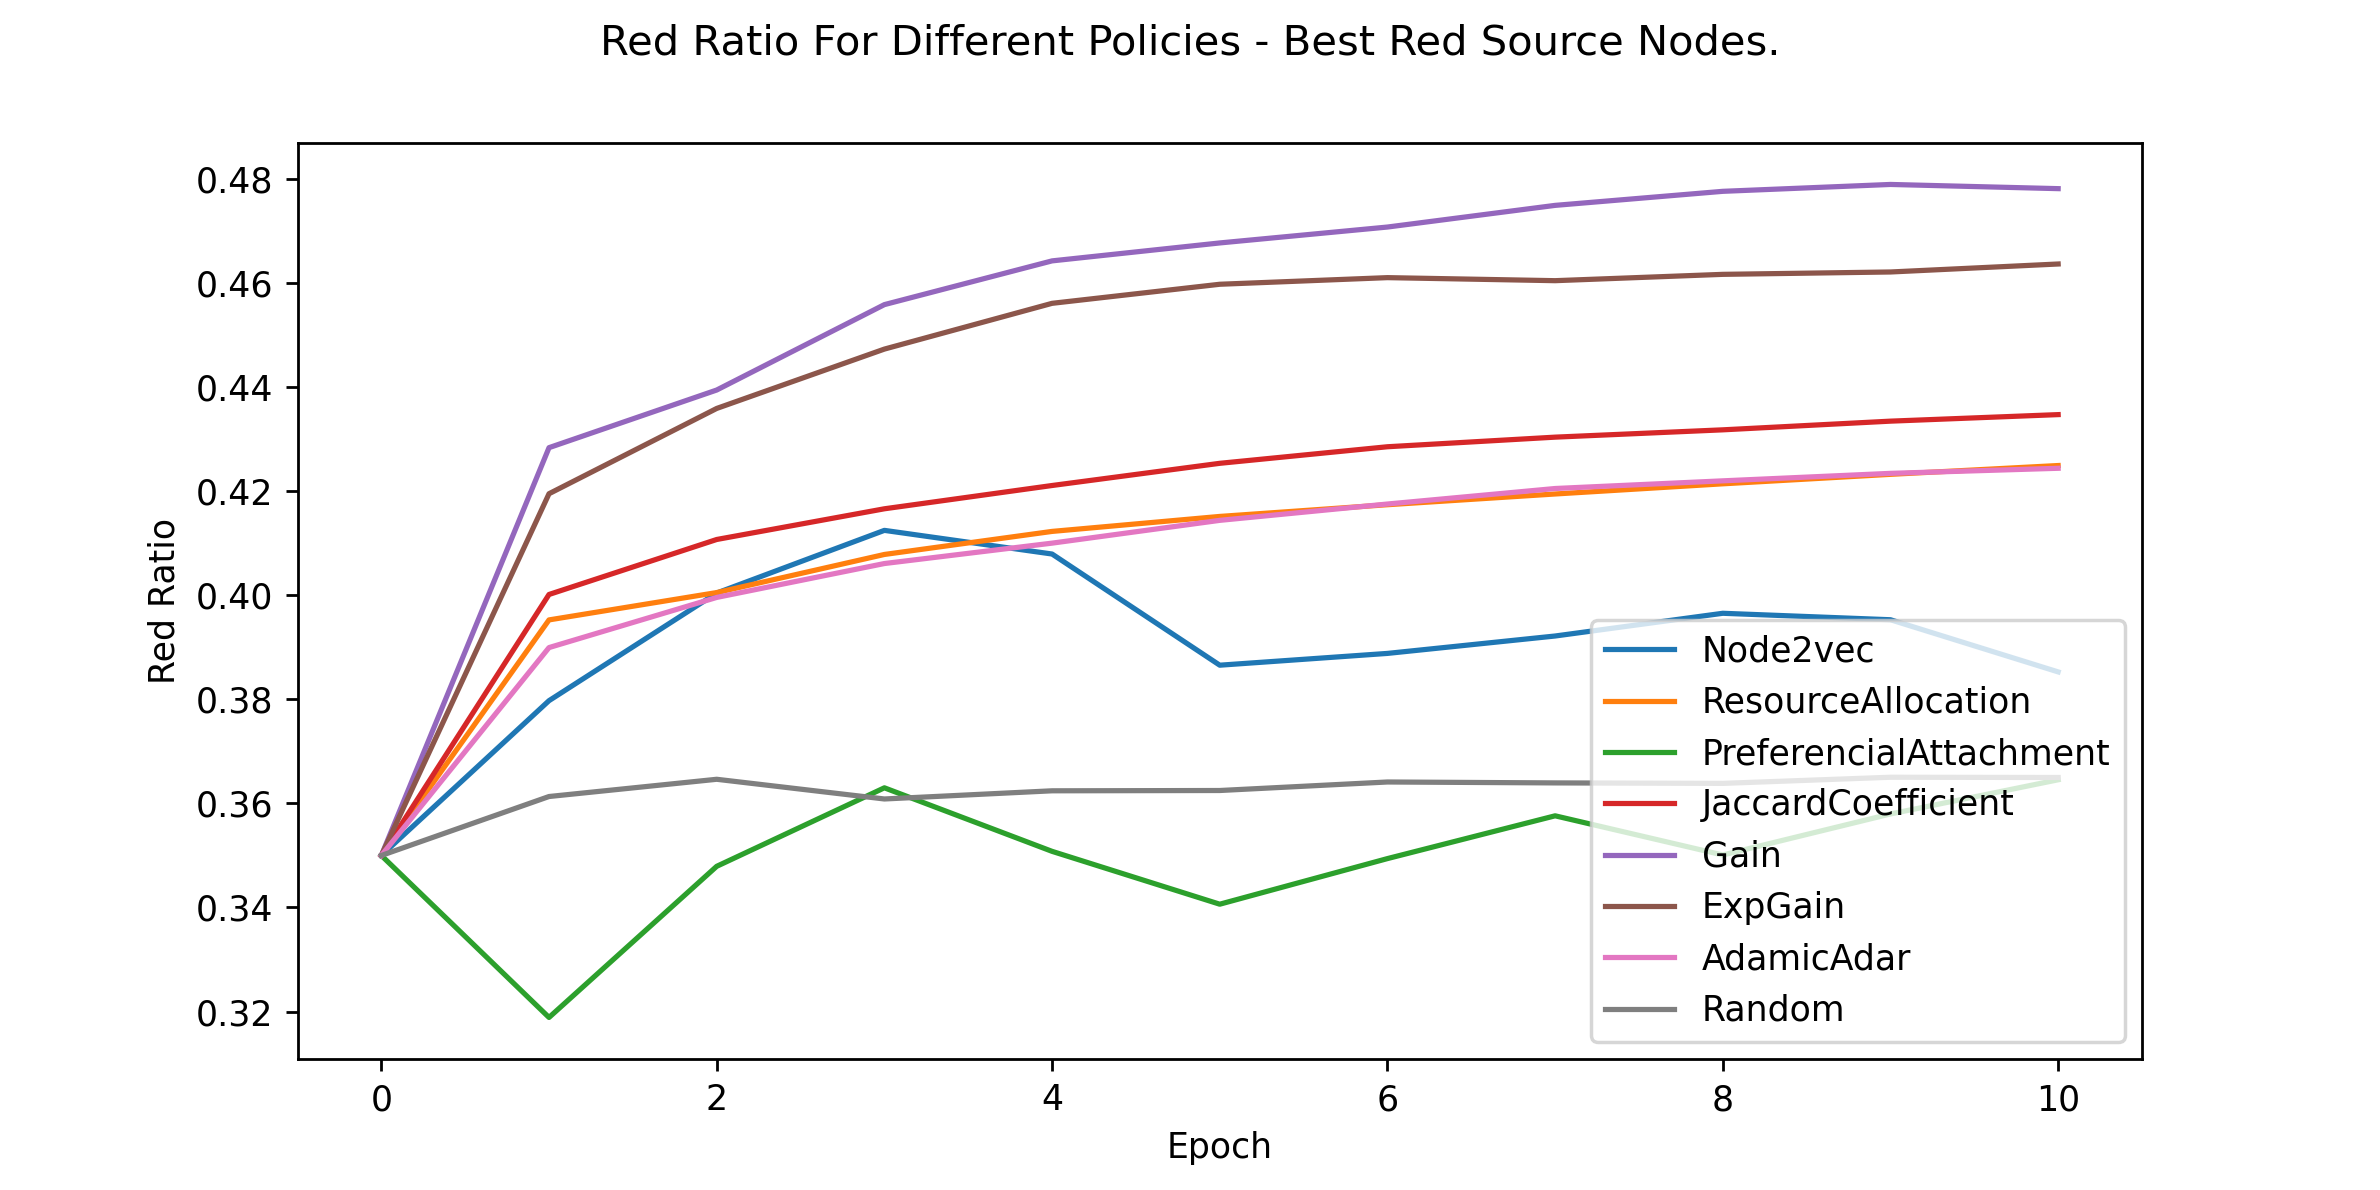

In [45]:
fig = plt.figure()
fig.suptitle('Red Ratio For Different Policies - Best Red Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Red Ratio')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Red ratio by different policies - Best blue source nodes.

In [46]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('redRatioBy%sBlueSources.txt' %policy)

<IPython.core.display.Javascript object>


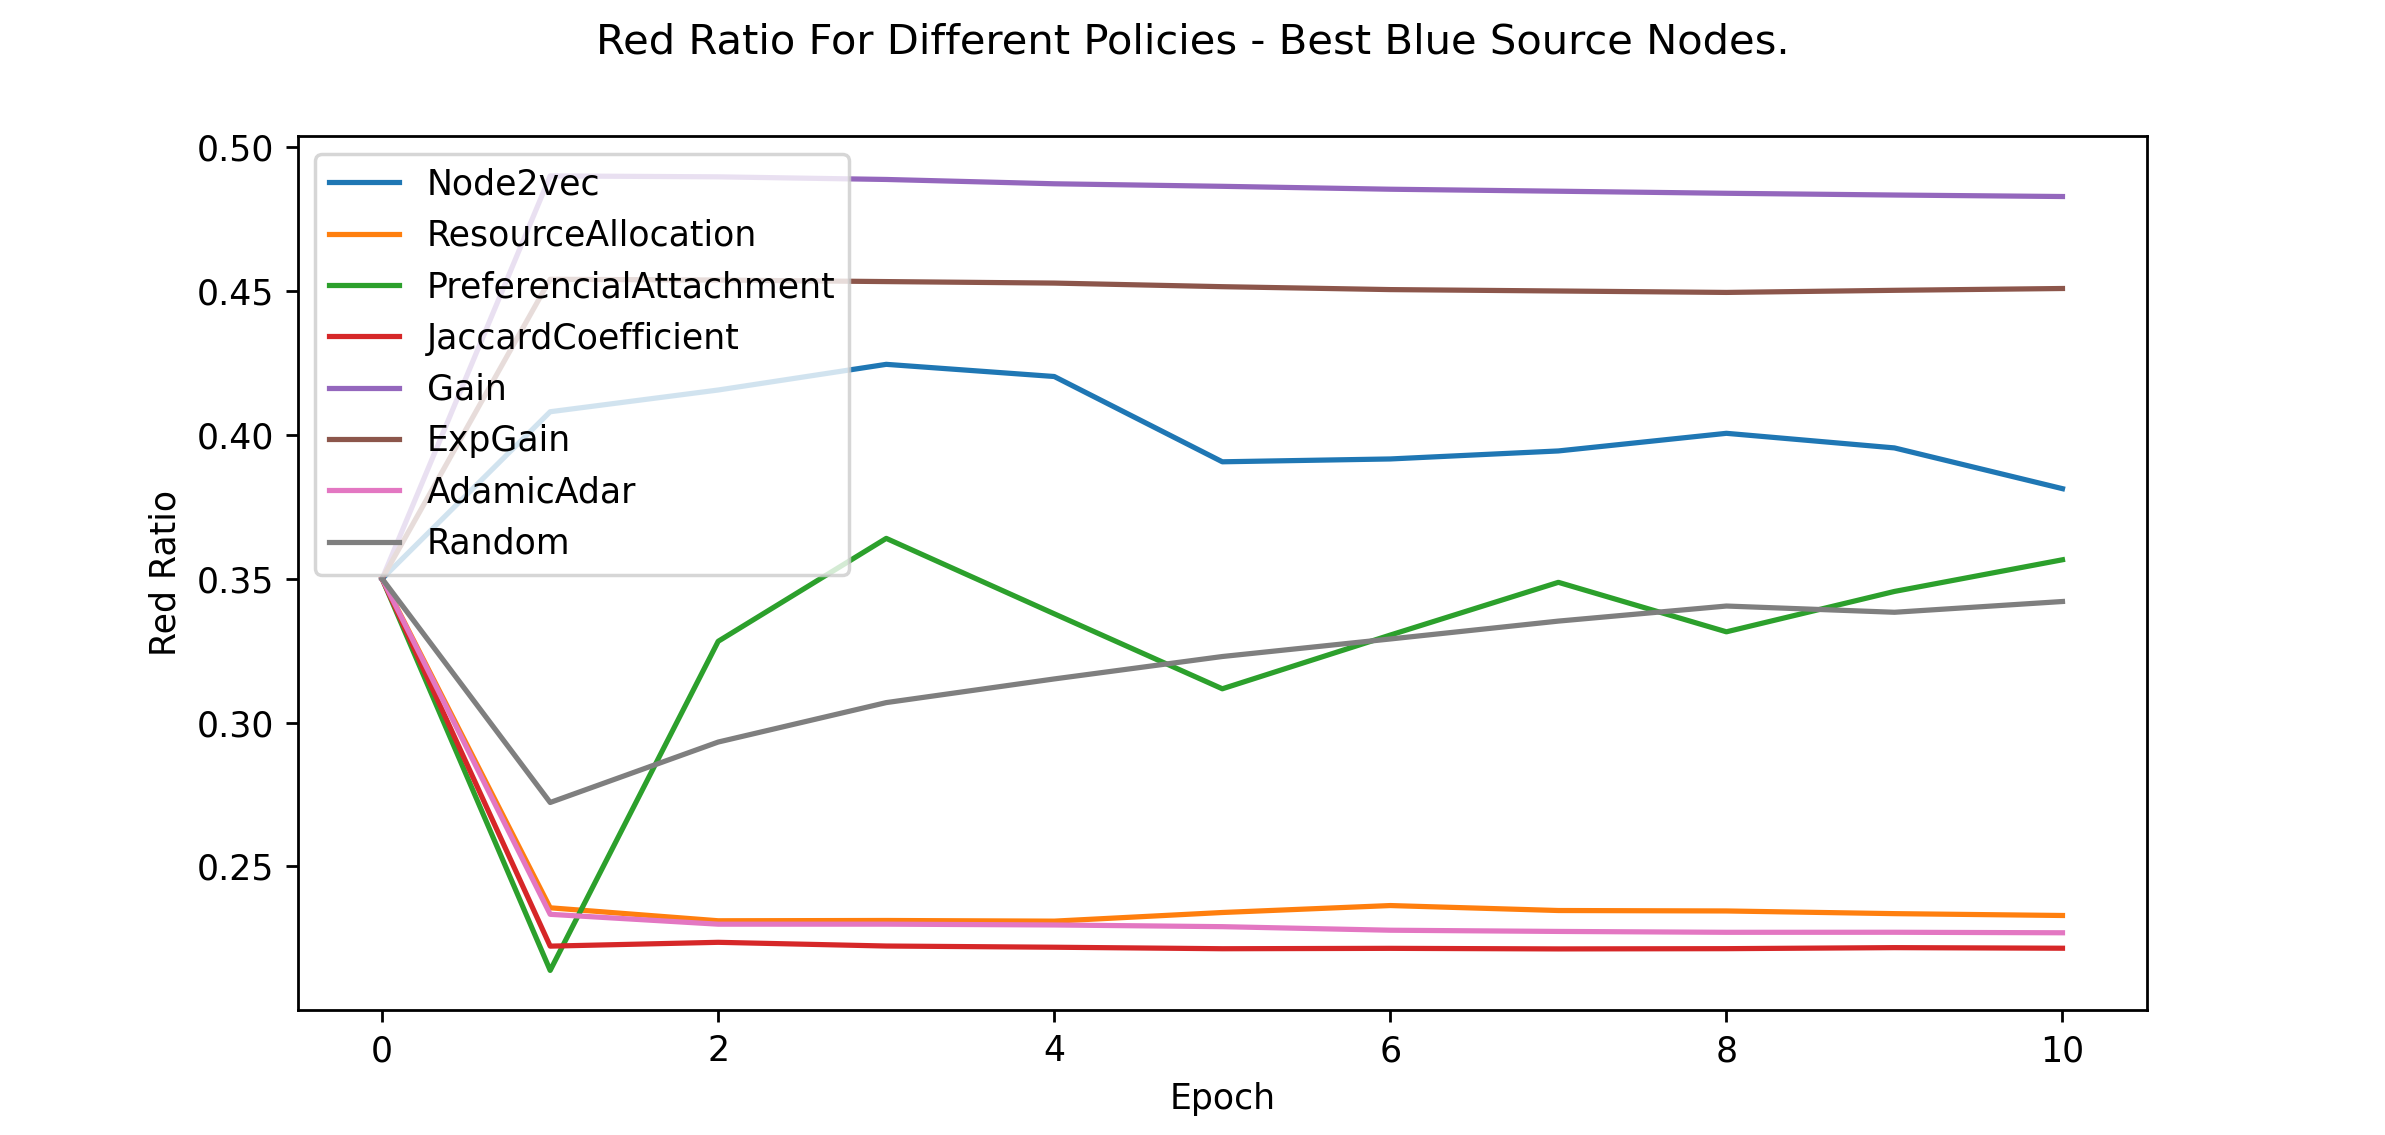

In [47]:
fig = plt.figure()
fig.suptitle('Red Ratio For Different Policies - Best Blue Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Red Ratio')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Average acceptance probability (node2vec recommendation) by different policies - Random source nodes.

In [48]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('node2vecBy%sRandomSources.txt' %policy)

<IPython.core.display.Javascript object>


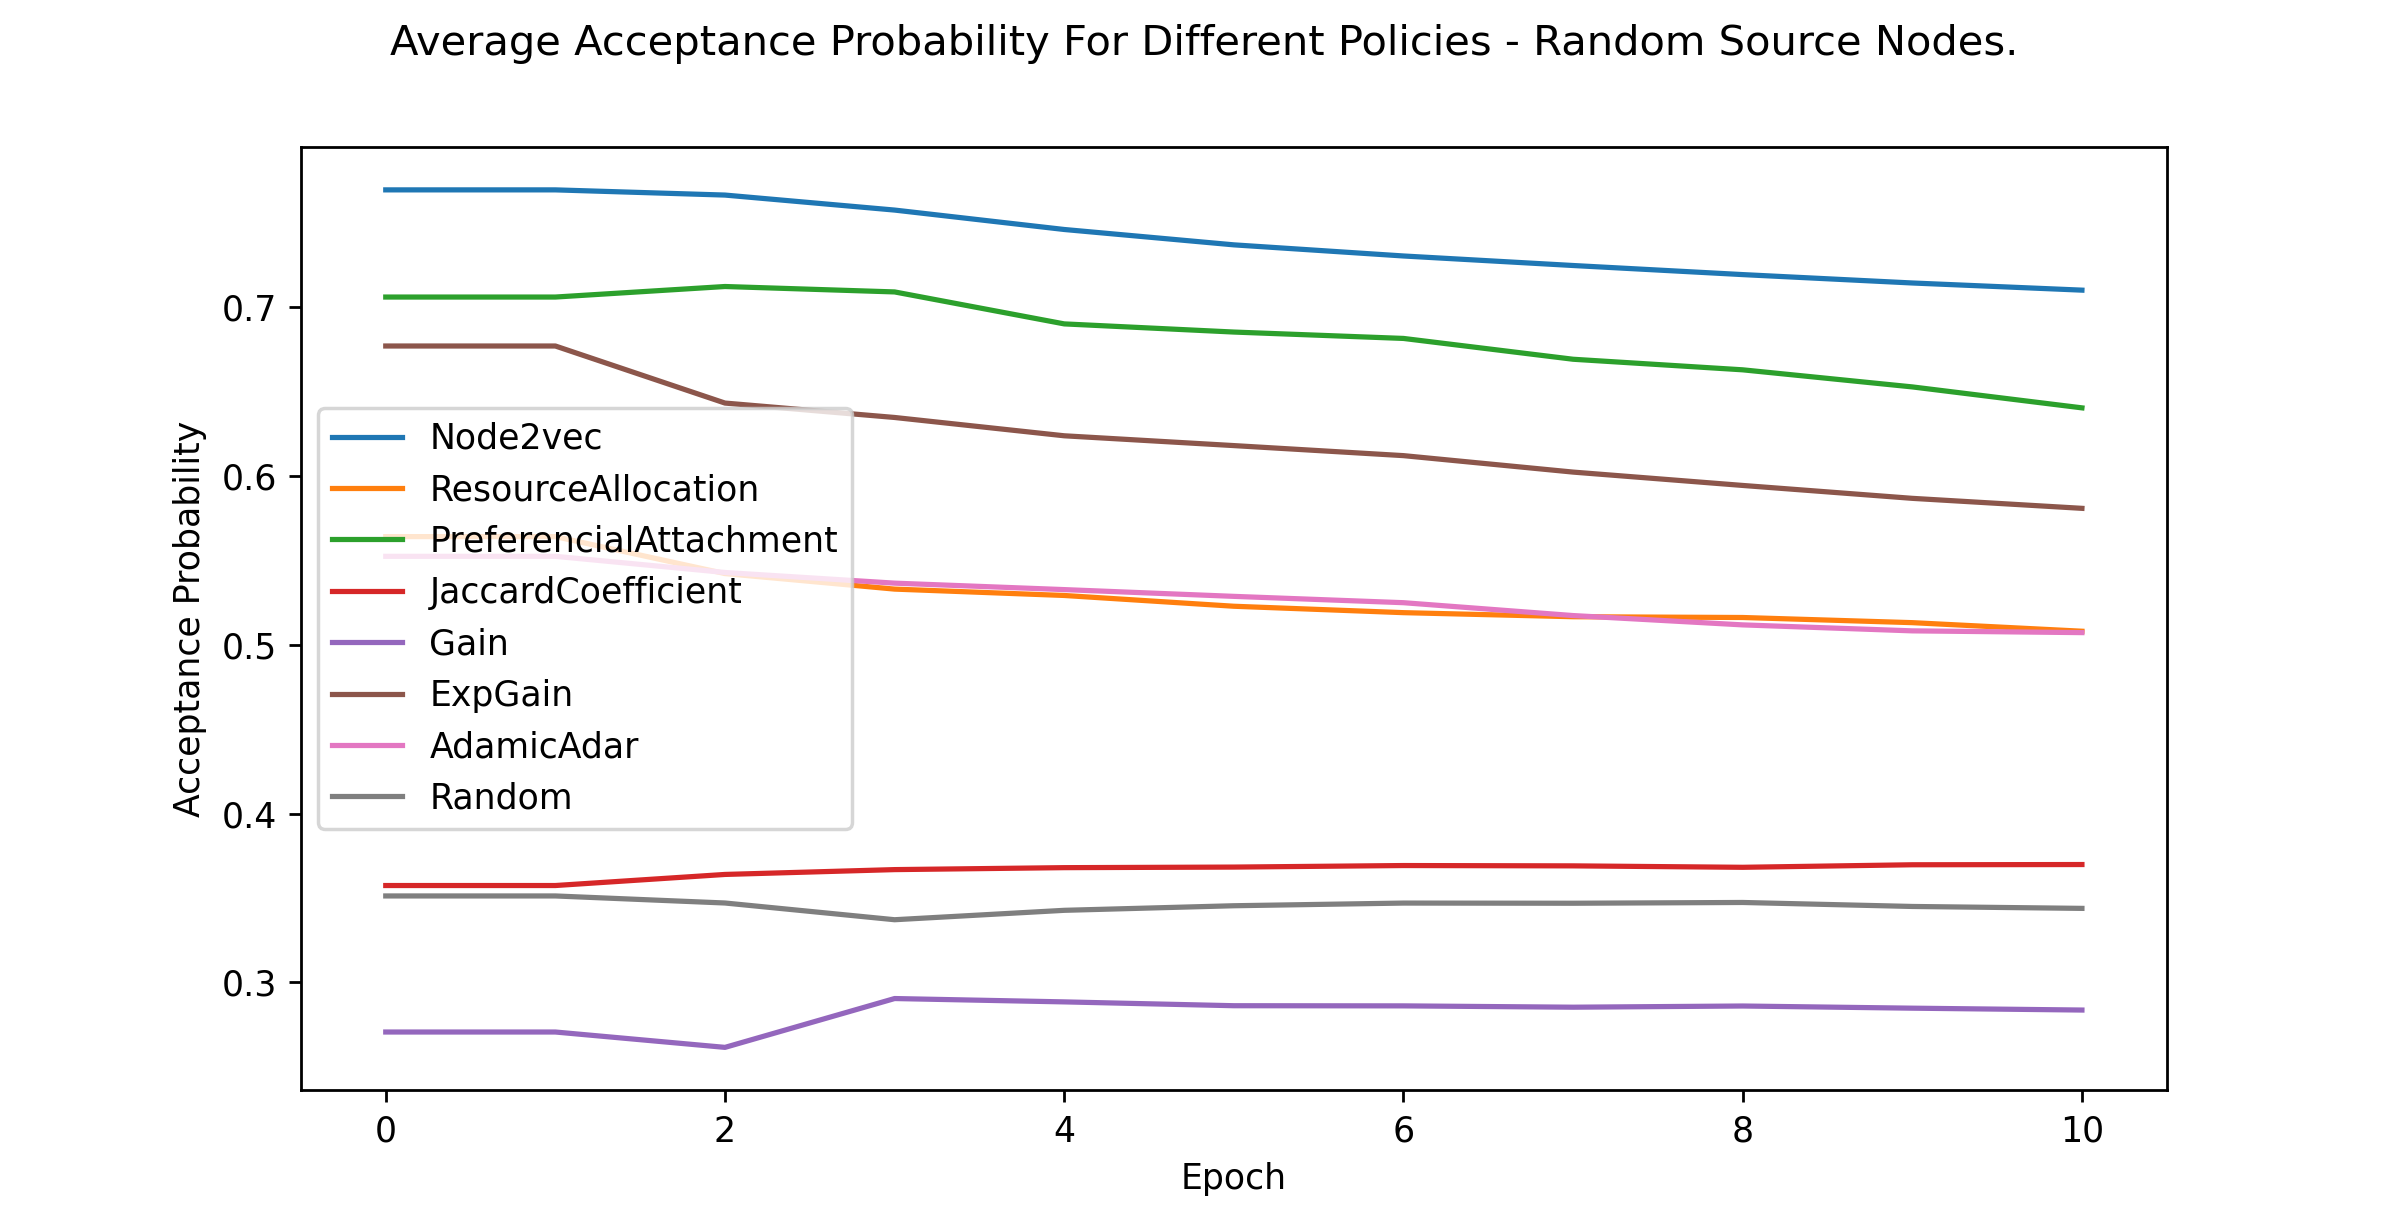

In [49]:
fig = plt.figure()
fig.suptitle('Average Acceptance Probability For Different Policies - Random Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Acceptance Probability')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Average acceptance probability (node2vec recommendation) by different policies - Best red source nodes.

In [50]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('node2vecBy%sRedSources.txt' %policy)

<IPython.core.display.Javascript object>


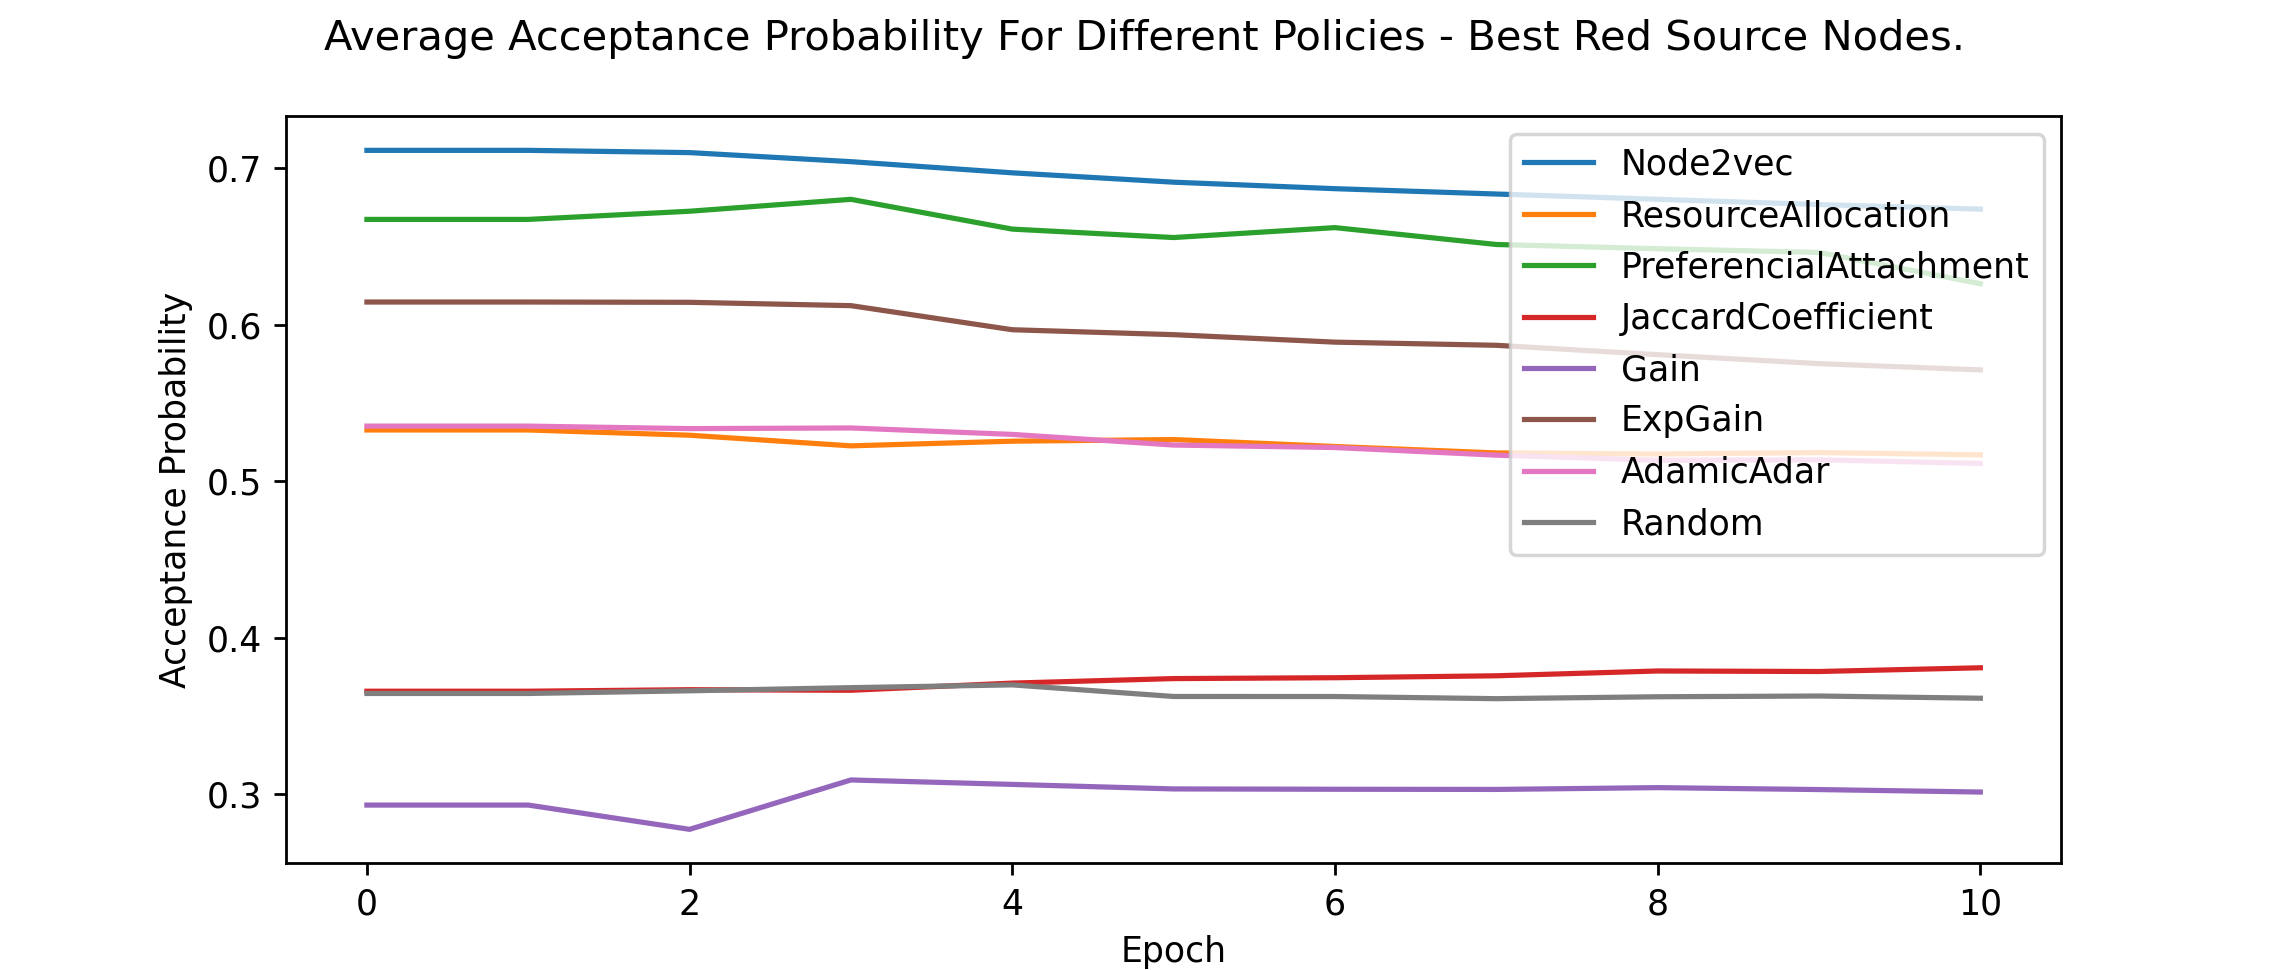

In [51]:
fig = plt.figure()
fig.suptitle('Average Acceptance Probability For Different Policies - Best Red Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Acceptance Probability')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Average acceptance probability (node2vec recommendation) by different policies - Best blue source nodes.

In [52]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('node2vecBy%sBlueSources.txt' %policy)

<IPython.core.display.Javascript object>


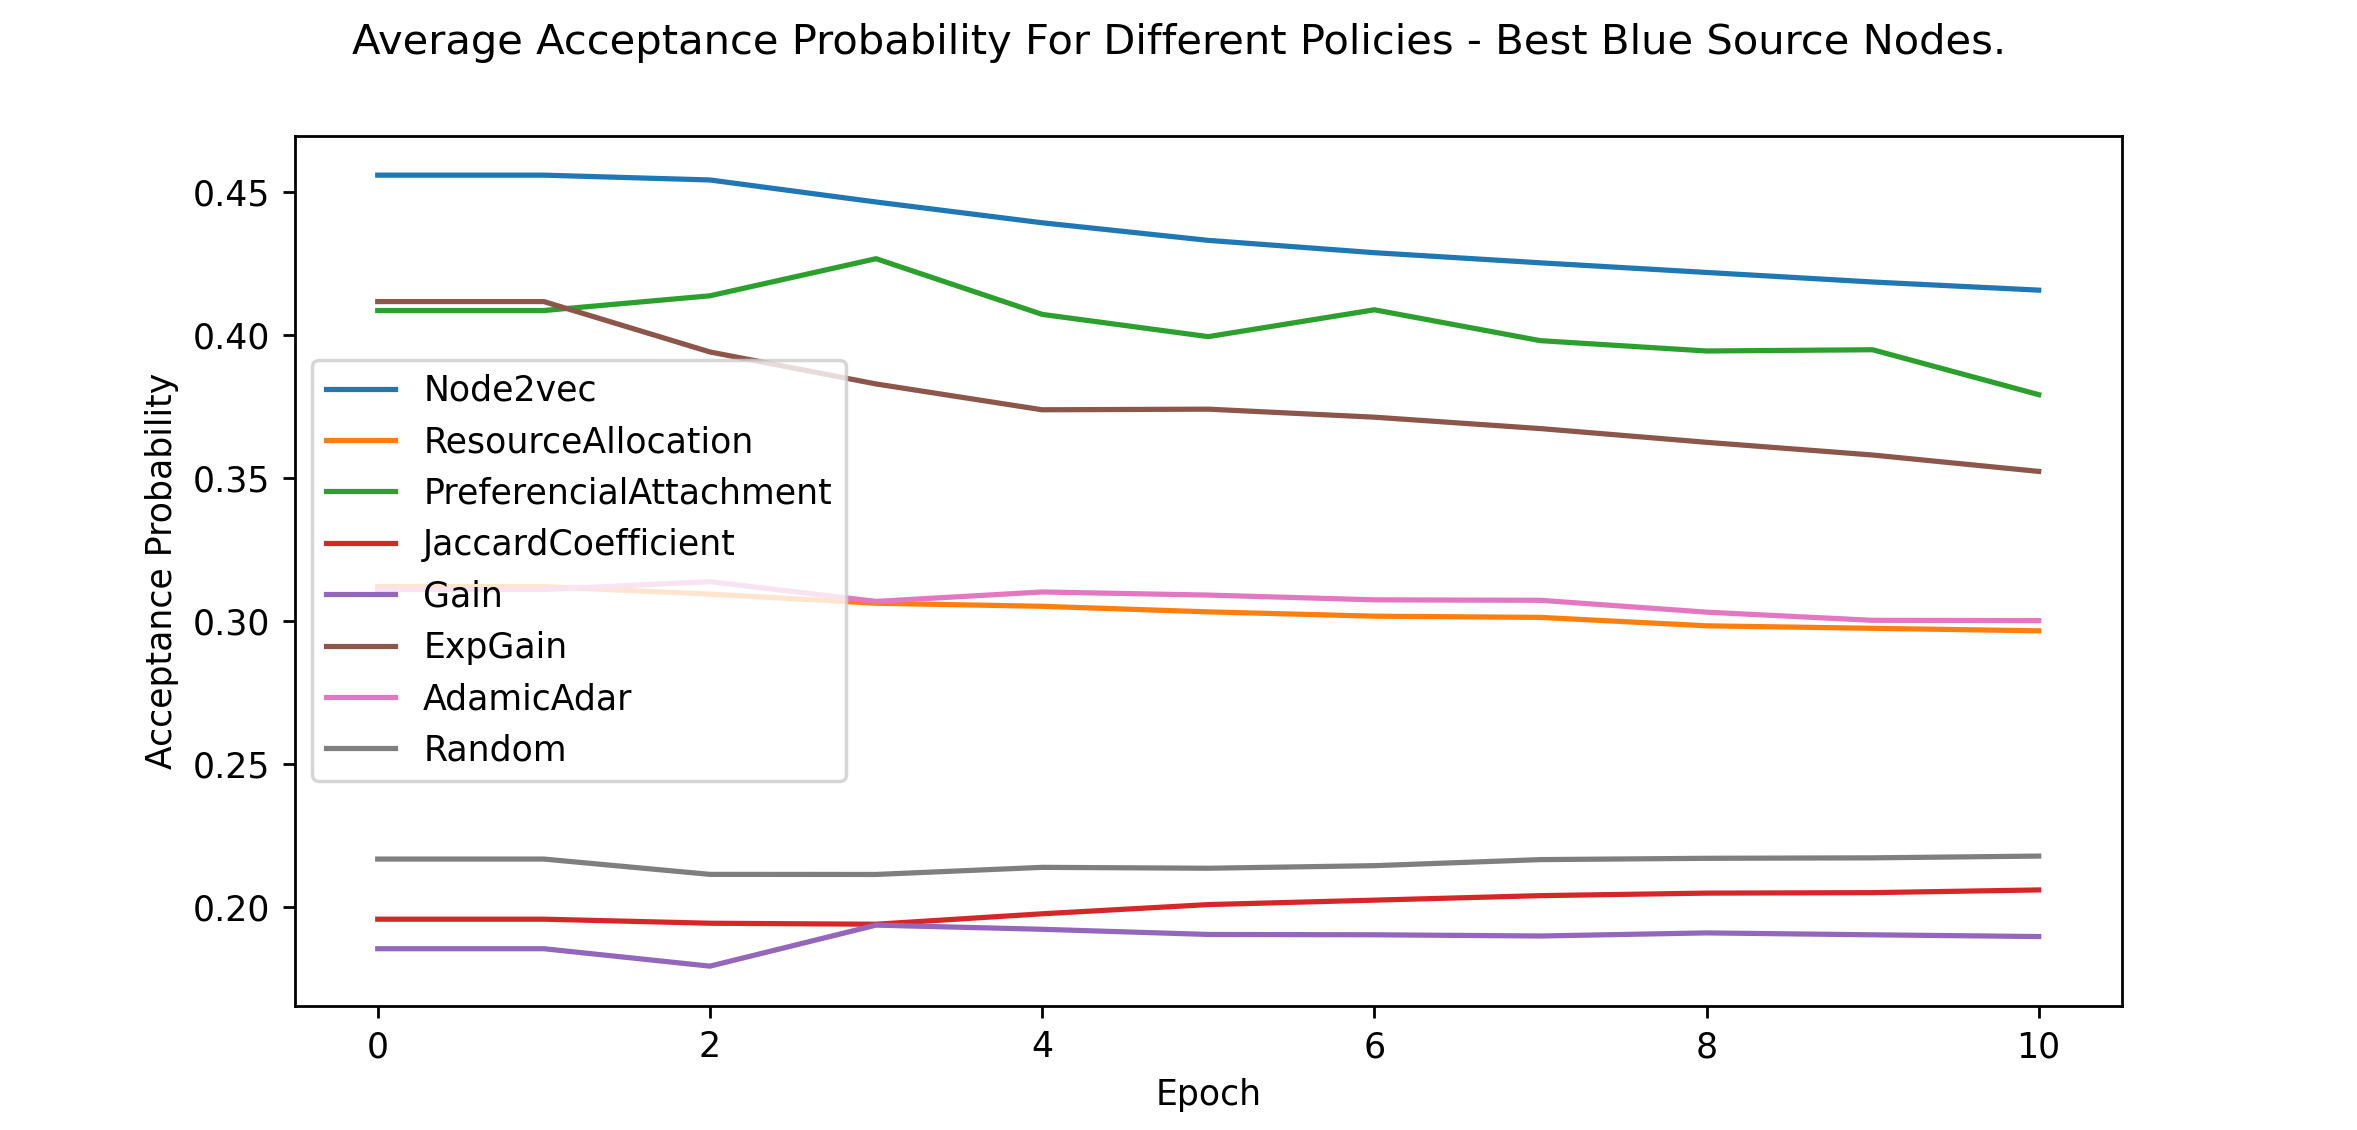

In [53]:
fig = plt.figure()
fig.suptitle('Average Acceptance Probability For Different Policies - Best Blue Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Acceptance Probability')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Final PageRank vs initial PageRank - Random source nodes.

In [77]:
# Load PageRanks.
initialPagerank = np.loadtxt('out_pagerank.txt', skiprows= 1, usecols= 1)
finalPagerank = dict()
for policy in policies:
    finalPagerank[policy] = np.loadtxt('finalPagerankBy%sRandomSources.txt' %policy, skiprows=1, usecols= 1)

In [78]:
# Load Communities.
tempCommunities = np.loadtxt('out_community.txt', skiprows= 1, dtype =int)
communities= np.zeros(tempCommunities[:,1].size, dtype= int)

for i in range(communities.size):
    node = tempCommunities[i][0]
    community = tempCommunities[i][1]
    communities[node] = community

In [133]:
# To calculate red ratio of network every 10 nodes.
def getRedRatio(pagerank, communities):
    index = np.argsort(-pagerank)
    redPagerank = 0.
    totalPagerank = 0.
    redRatio = 0.
    redRatios = []
    for i in range(pagerank.size):
        totalPagerank += pagerank[index[i] ]
        if communities[index[i] ]:
            redPagerank += pagerank[index[i] ]
        if (i + 1) % 10 == 0:
            redRatio = redPagerank / totalPagerank
            redRatios.append(redRatio)
    
    return redRatios

In [134]:
# Calculate red ratio per 10 nodes for all policies.
initialRedRatio = getRedRatio(initialPagerank, communities)
redRatios = dict()
for policy in policies:
    redRatio[policy] = getRedRatio(finalPagerank[policy], communities)

<IPython.core.display.Javascript object>


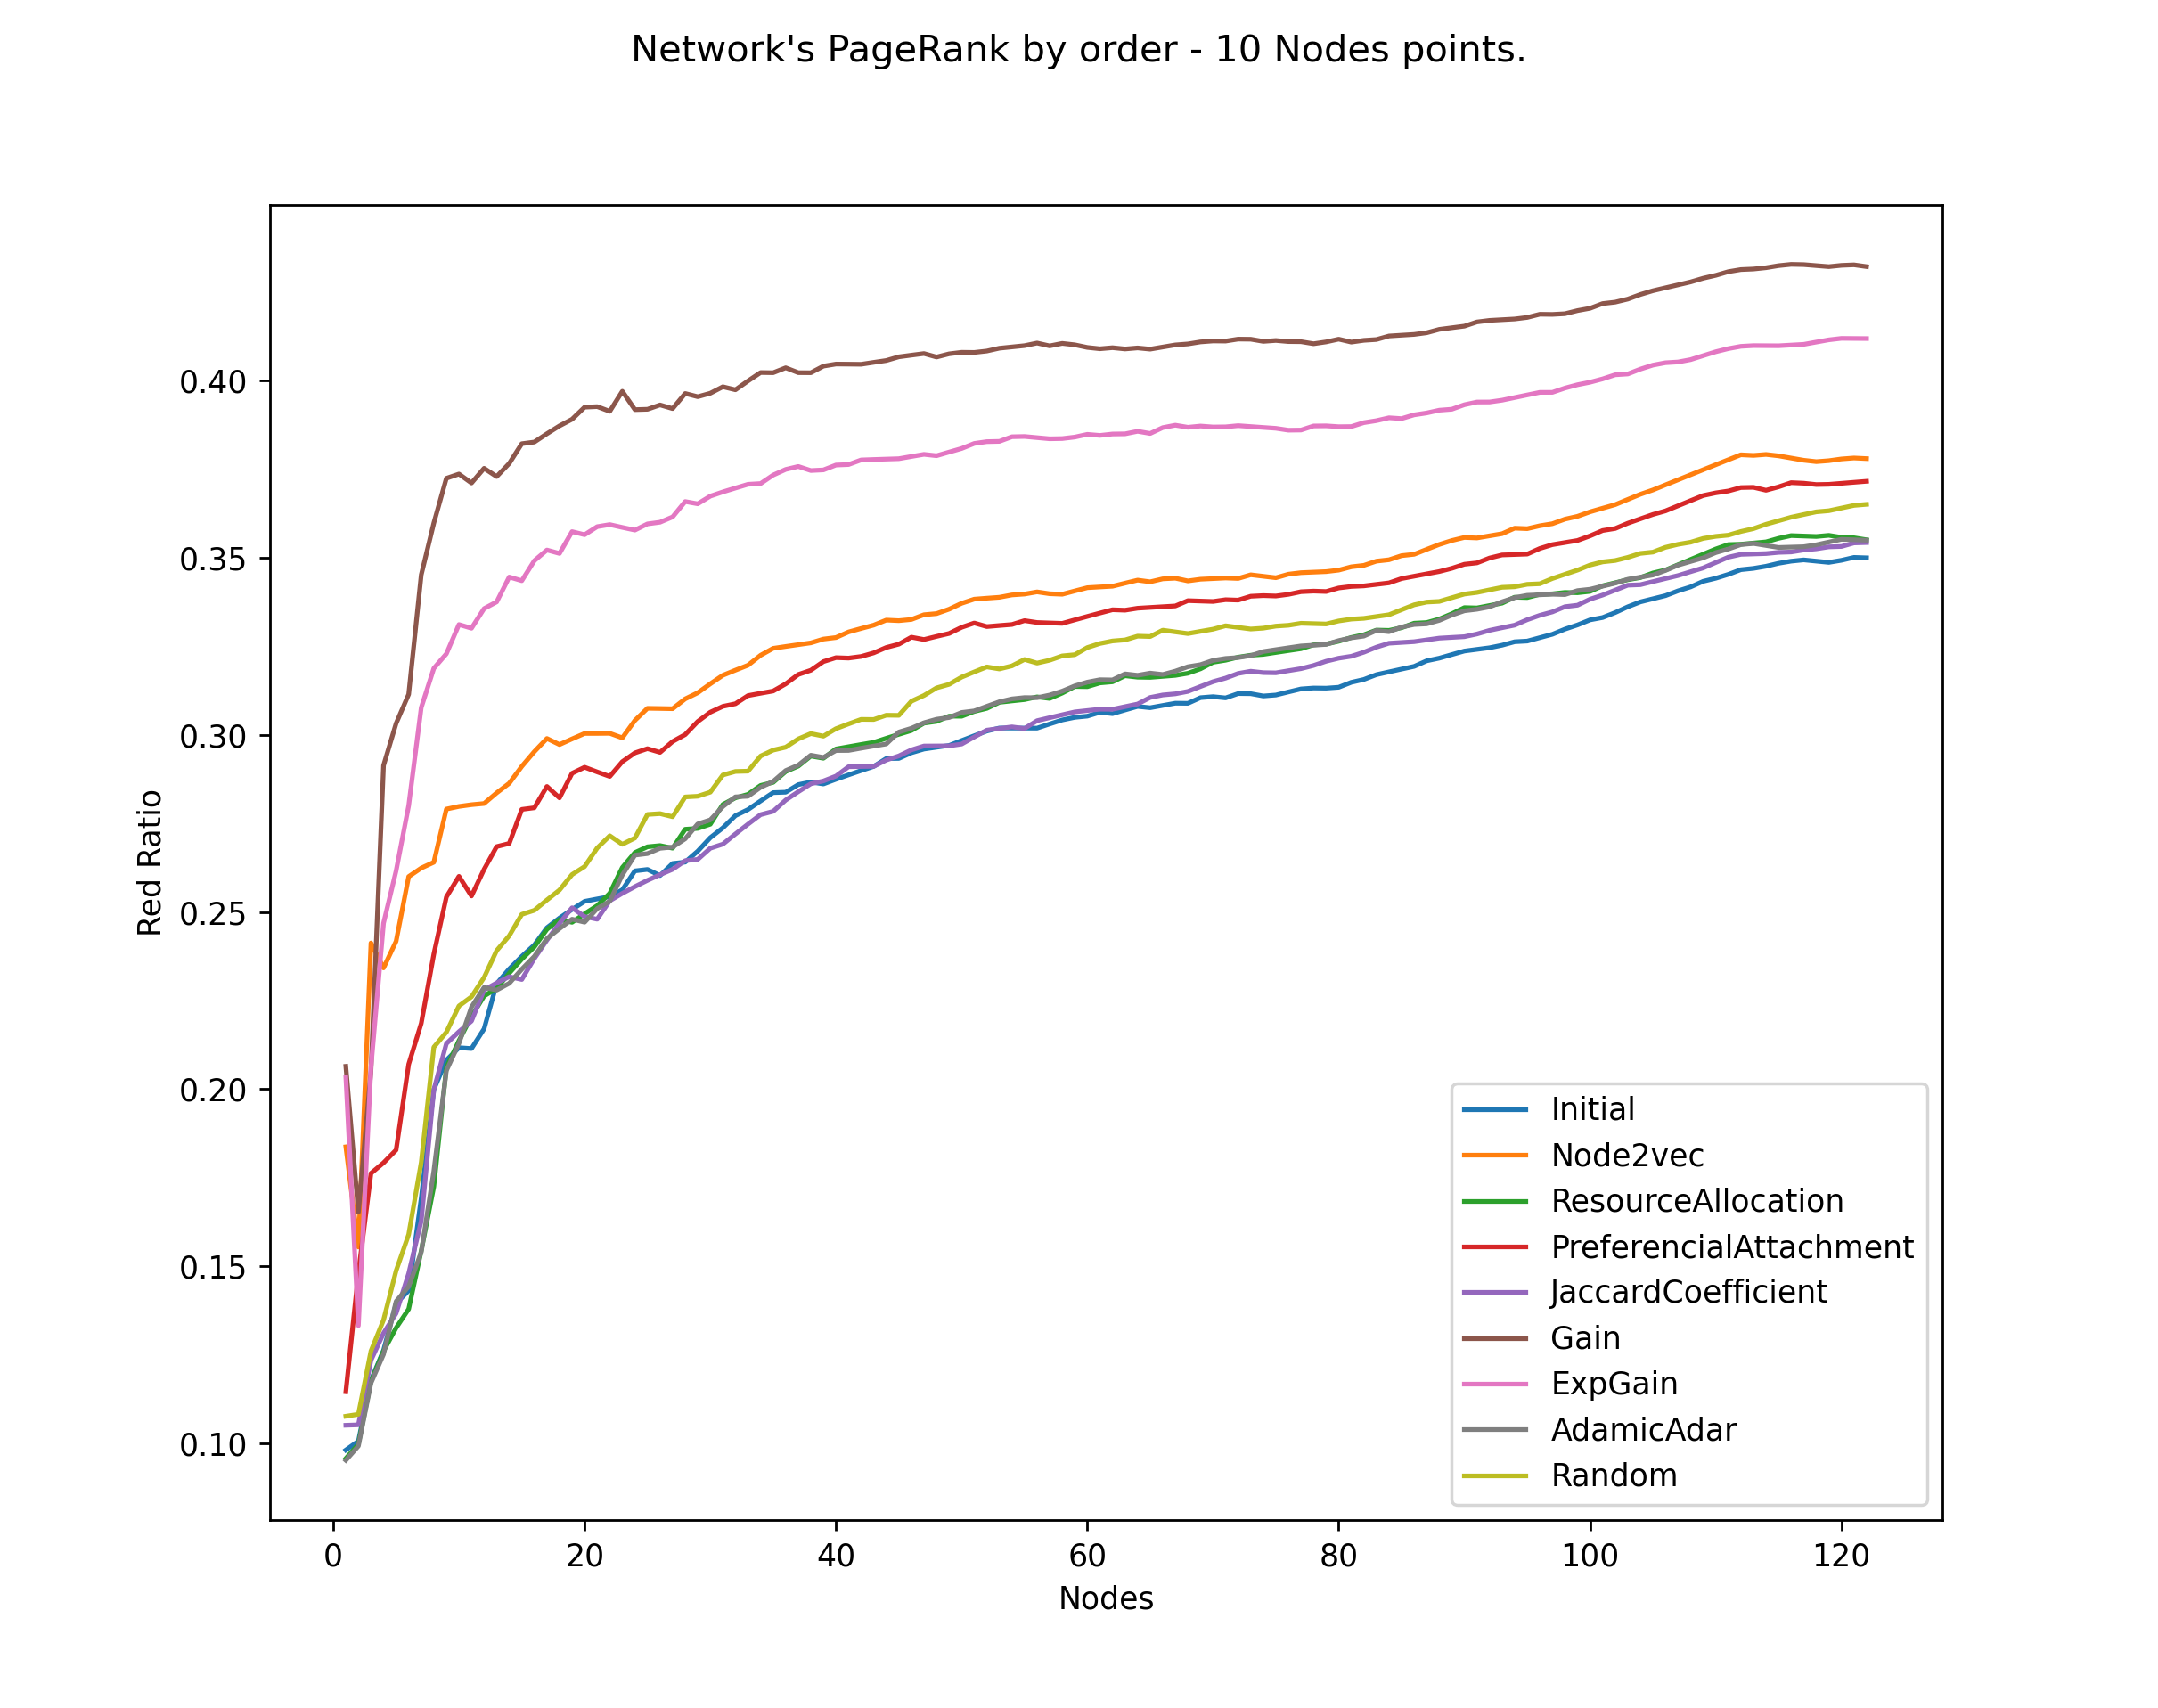

In [137]:
fig = plt.figure()
fig.suptitle("Network's PageRank by order - 10 Nodes points.")
plt.xlabel("Nodes")
plt.ylabel("Red Ratio")
xAxis= np.arange(1, len(initialRedRatio) + 1)
plt.plot(xAxis, initialRedRatio, label= 'Initial')
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Final PageRank vs initial PageRank - Best red source nodes.

In [138]:
finalPagerank = dict()
for policy in policies:
    finalPagerank[policy] = np.loadtxt('finalPagerankBy%sRedSources.txt' %policy, skiprows=1, usecols= 1)

In [139]:
# Calculate red ratio per 10 nodes for all policies.
initialRedRatio = getRedRatio(initialPagerank, communities)
redRatios = dict()
for policy in policies:
    redRatio[policy] = getRedRatio(finalPagerank[policy], communities)

<IPython.core.display.Javascript object>


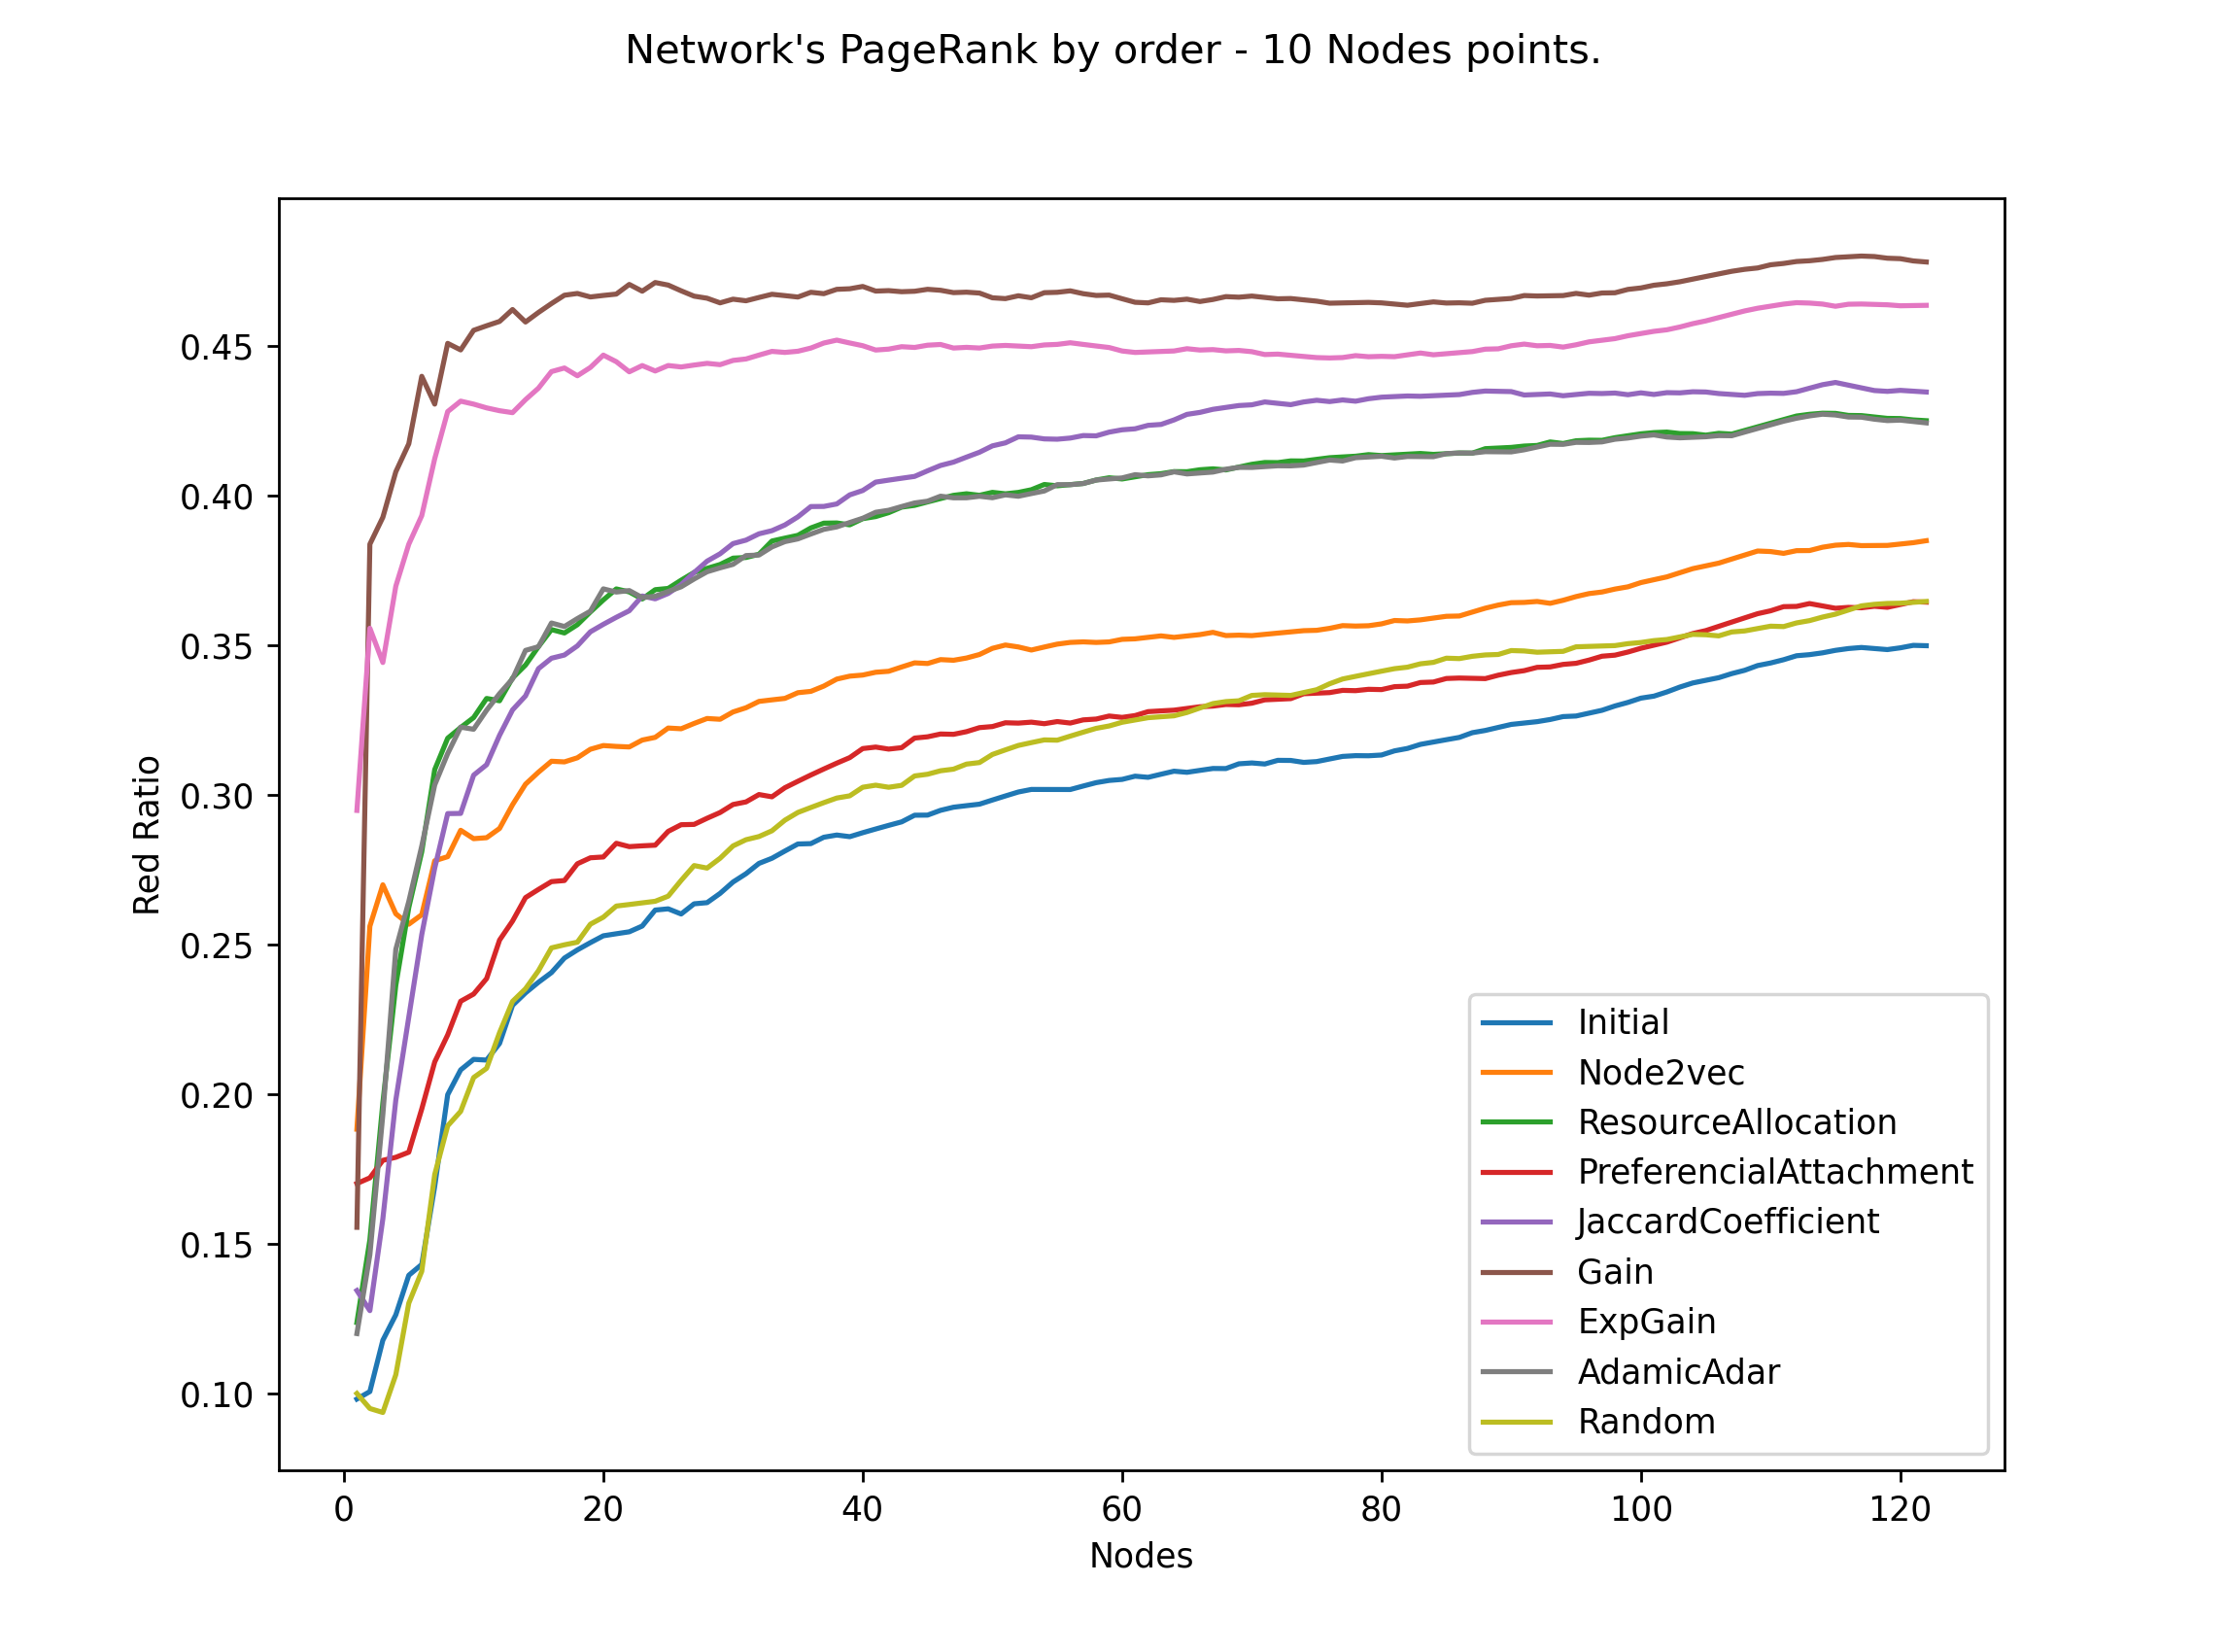

In [140]:
fig = plt.figure()
fig.suptitle("Network's PageRank by order - 10 Nodes points.")
plt.xlabel("Nodes")
plt.ylabel("Red Ratio")
xAxis= np.arange(1, len(initialRedRatio) + 1)
plt.plot(xAxis, initialRedRatio, label= 'Initial')
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Final PageRank vs initial PageRank - Best blue source nodes.

In [141]:
finalPagerank = dict()
for policy in policies:
    finalPagerank[policy] = np.loadtxt('finalPagerankBy%sBlueSources.txt' %policy, skiprows=1, usecols= 1)

In [142]:
# Calculate red ratio per 10 nodes for all policies.
initialRedRatio = getRedRatio(initialPagerank, communities)
redRatios = dict()
for policy in policies:
    redRatio[policy] = getRedRatio(finalPagerank[policy], communities)

<IPython.core.display.Javascript object>


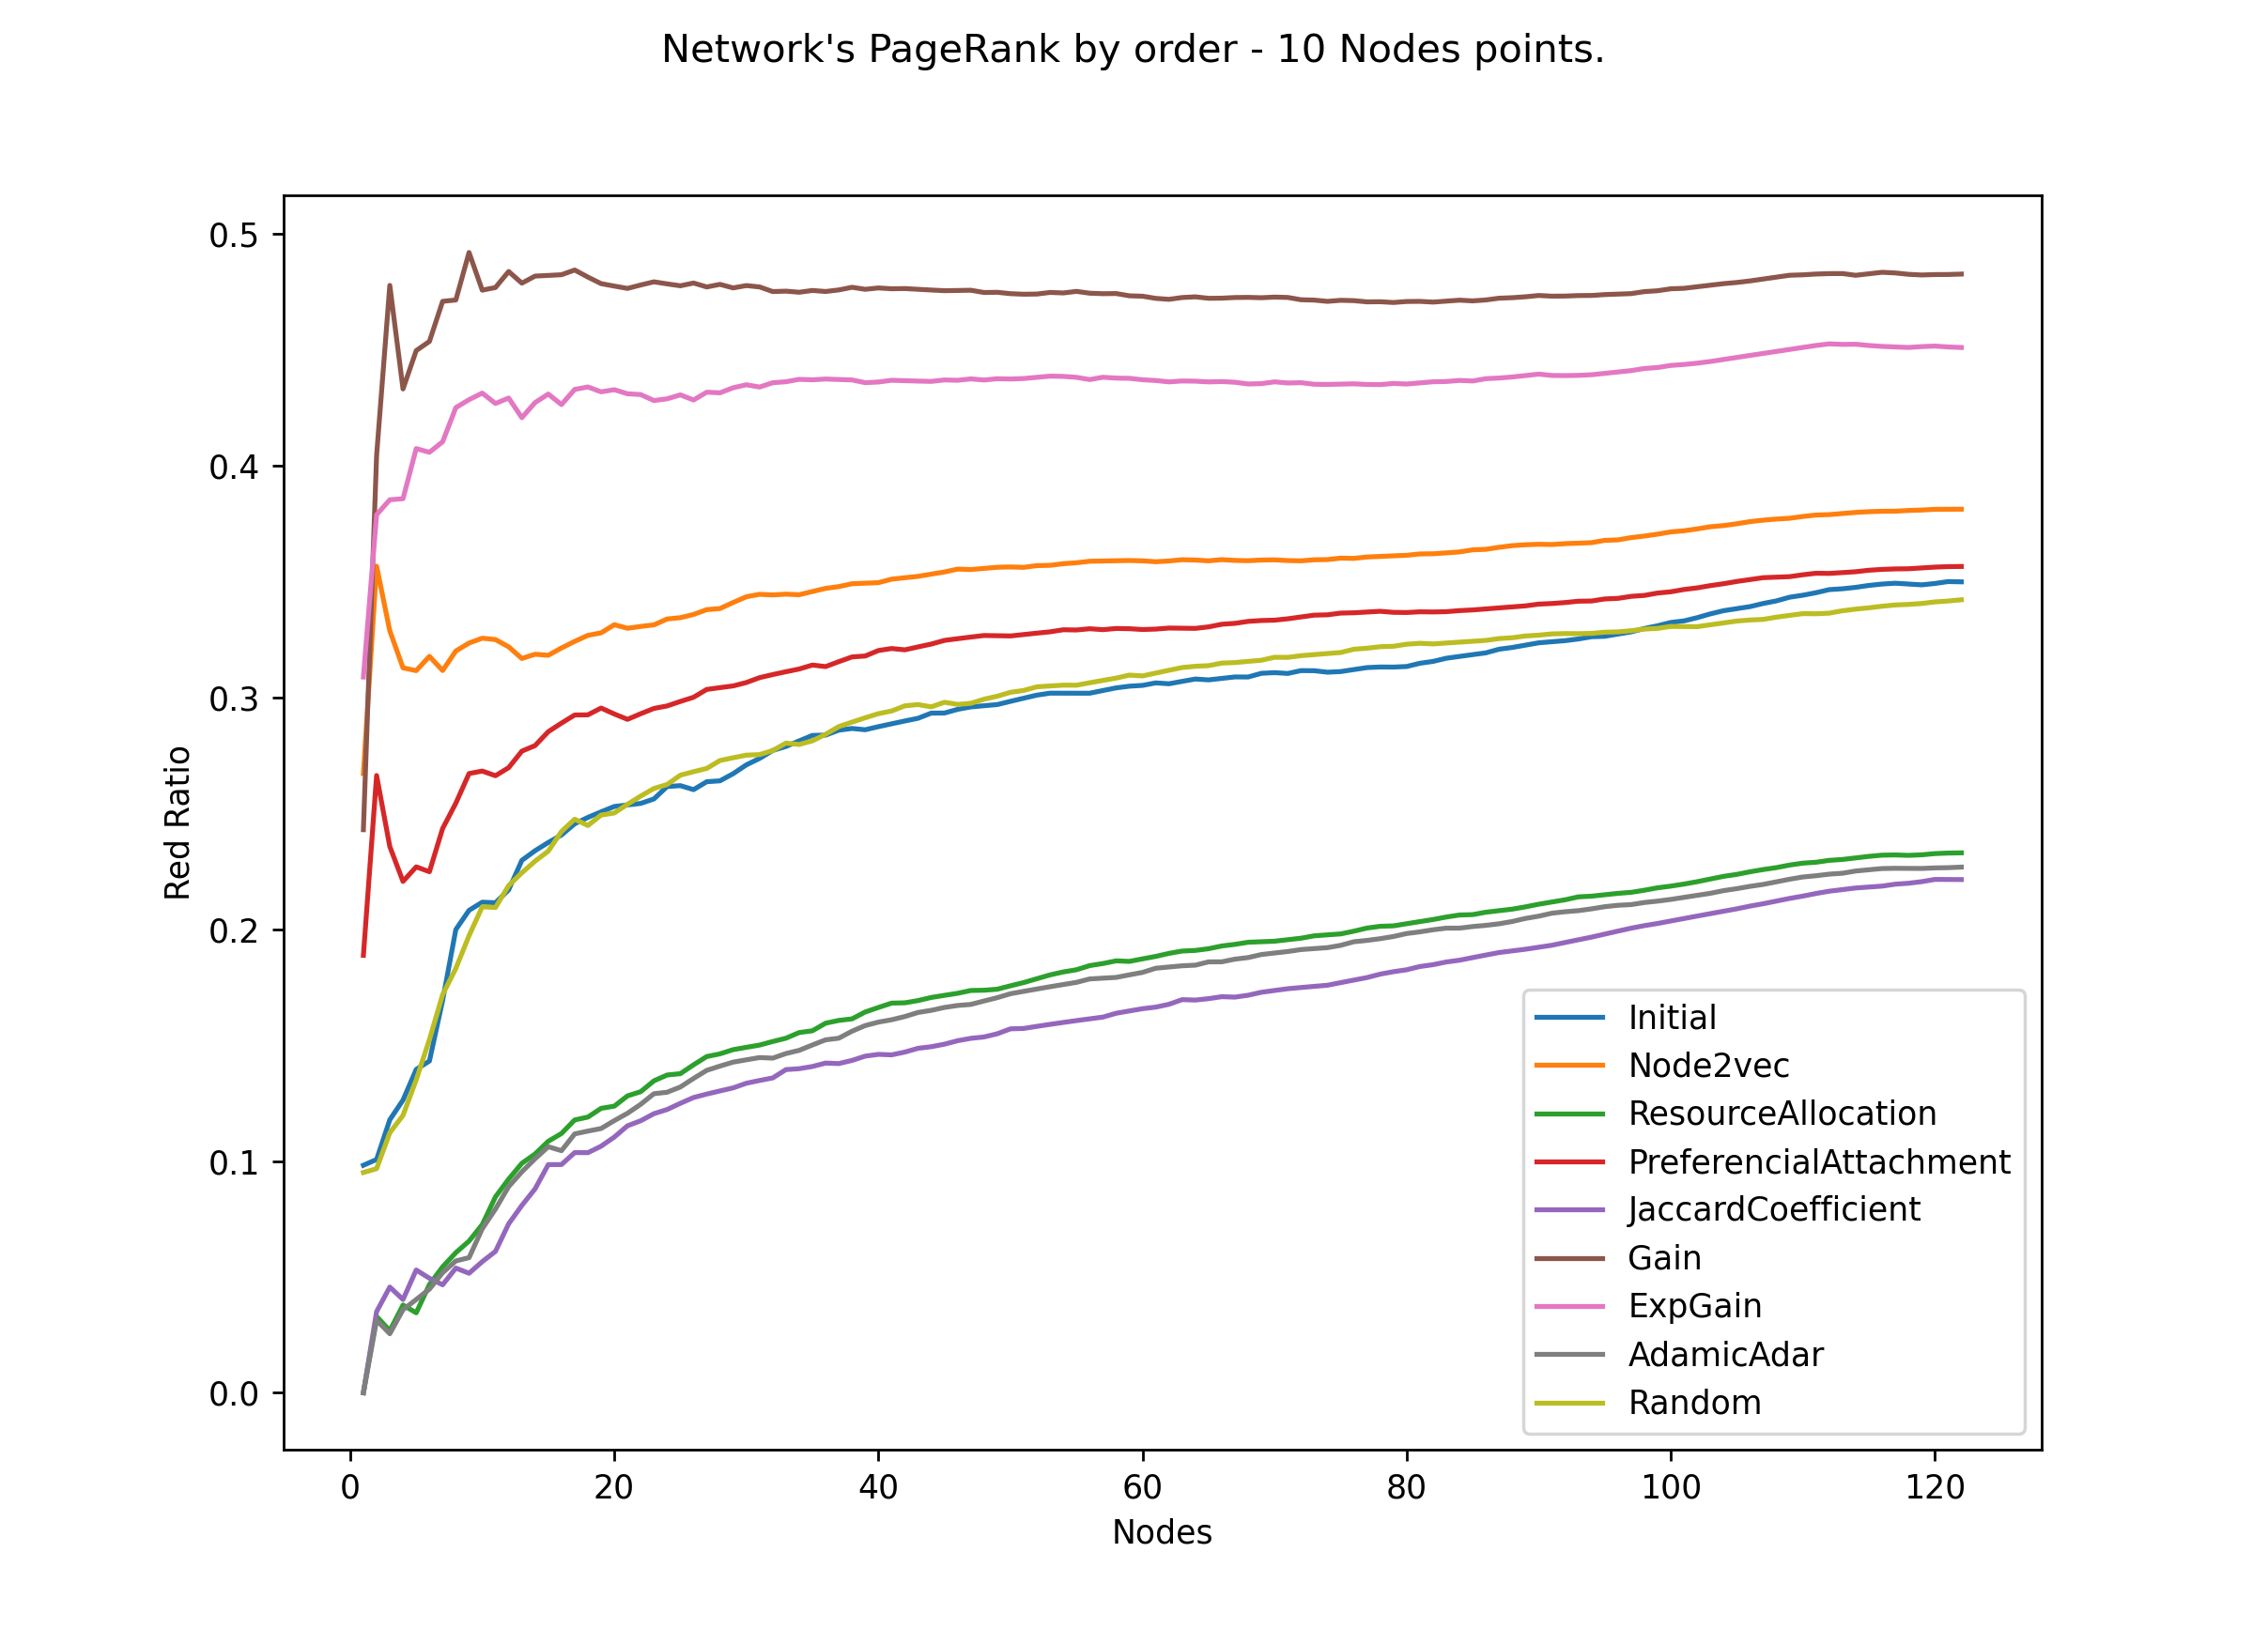

In [143]:
fig = plt.figure()
fig.suptitle("Network's PageRank by order - 10 Nodes points.")
plt.xlabel("Nodes")
plt.ylabel("Red Ratio")
xAxis= np.arange(1, len(initialRedRatio) + 1)
plt.plot(xAxis, initialRedRatio, label= 'Initial')
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Target nodes analysis by each policy - Random source nodes.

In [144]:
# Load edges selected by each policy.
edgesSelected = dict()
for policy in policies:
    edgesSelected[policy] = pd.read_csv('edgesSelectedBy%sRandomSources.txt' %policy, sep= '\t')

In [152]:
edgesSelected['Node2vec'].head()

,Source,Target,node2vecScore,resAllocScore,jaccCoefScore,prefAttScore,adamicAdarScore,gain,expGain
0,1204,454,0.975626,0.273275,0.032000,3645,2.22518,-0.000032,-0.000031
1,1190,454,0.847475,0.014950,0.008163,972,0.39972,-0.000024,-0.000020
2,701,454,0.946166,0.000000,0.000000,729,0.00000,0.000288,0.000272
3,69,454,0.737878,0.643713,0.067669,9963,5.13824,-0.000002,-0.000001
4,1059,454,0.768113,0.000000,0.000000,243,0.00000,0.000182,0.000140


In [150]:
uniqueDestinations = dict()
for policy in policies:
    uniqueDestinations[policy] = edgesSelected[policy]['Target'].nunique()

In [151]:
uniqueDestinations

{'Node2vec': 17,
 'ResourceAllocation': 380,
 'PreferencialAttachment': 18,
 'JaccardCoefficient': 628,
 'Gain': 27,
 'ExpGain': 50,
 'AdamicAdar': 347,
 'Random': 766}

In [187]:
mean = dict()
for policy in policies:
    mean[policy] = edgesSelected[policy].mean().take([2,3,4,5,6,7,8])

mean = pd.DataFrame.from_dict(mean)
print("Mean values for selected edges per policy")
mean

Mean values for selected edges per policy


,Node2vec,ResourceAllocation,PreferencialAttachment,JaccardCoefficient,Gain,ExpGain,AdamicAdar,Random
node2vecScore,0.709913,0.507952,0.640211,0.369803,0.283640,0.580713,0.507121,0.343841
resAllocScore,0.091495,0.265137,0.133244,0.168203,0.003749,0.030133,0.254930,0.015569
jaccCoefScore,0.020408,0.112975,0.025898,0.265611,0.014136,0.021932,0.118794,0.020127
prefAttScore,3937.168033,3659.000820,5838.439344,1884.616393,122.172951,1937.676230,3657.730328,585.577869
adamicAdarScore,1.095282,3.241303,1.692272,2.479008,0.064016,0.454746,3.355209,0.277686
gain,0.000082,0.000018,0.000053,0.000004,0.000267,0.000208,0.000019,0.000039
expGain,0.000068,0.000007,0.000044,0.000005,0.000086,0.000134,0.000006,0.000016


### Target nodes analysis by each policy - Best red source nodes.

In [188]:
# Load edges selected by each policy.
edgesSelected = dict()
for policy in policies:
    edgesSelected[policy] = pd.read_csv('edgesSelectedBy%sRedSources.txt' %policy, sep= '\t')

In [189]:
uniqueDestinations = dict()
for policy in policies:
    uniqueDestinations[policy] = edgesSelected[policy]['Target'].nunique()
uniqueDestinations

{'Node2vec': 12,
 'ResourceAllocation': 278,
 'PreferencialAttachment': 11,
 'JaccardCoefficient': 408,
 'Gain': 21,
 'ExpGain': 40,
 'AdamicAdar': 250,
 'Random': 695}

In [190]:
mean = dict()
for policy in policies:
    mean[policy] = edgesSelected[policy].mean().take([2,3,4,5,6,7,8])

mean = pd.DataFrame.from_dict(mean)
print("Mean values for selected edges per policy")
mean

Mean values for selected edges per policy


,Node2vec,ResourceAllocation,PreferencialAttachment,JaccardCoefficient,Gain,ExpGain,AdamicAdar,Random
node2vecScore,0.673800,0.516824,0.626146,0.380776,0.301394,0.571095,0.511317,0.361328
resAllocScore,0.122551,0.239108,0.136179,0.138787,0.007240,0.060847,0.223446,0.013487
jaccCoefScore,0.021400,0.090760,0.019588,0.262745,0.027541,0.030433,0.095939,0.020356
prefAttScore,3177.395000,2936.491000,4582.956000,1338.508000,67.438000,1035.603000,3059.216000,477.086000
adamicAdarScore,1.222828,2.263575,1.428224,1.600237,0.095778,0.727784,2.359128,0.223359
gain,0.000174,0.000428,0.000075,0.000456,0.000687,0.000521,0.000435,0.000081
expGain,0.000147,0.000249,0.000062,0.000209,0.000238,0.000354,0.000248,0.000040


### Target nodes analysis by each policy - Best blue source nodes.

In [191]:
# Load edges selected by each policy.
edgesSelected = dict()
for policy in policies:
    edgesSelected[policy] = pd.read_csv('edgesSelectedBy%sBlueSources.txt' %policy, sep= '\t')

In [192]:
uniqueDestinations = dict()
for policy in policies:
    uniqueDestinations[policy] = edgesSelected[policy]['Target'].nunique()
uniqueDestinations

{'Node2vec': 10,
 'ResourceAllocation': 335,
 'PreferencialAttachment': 10,
 'JaccardCoefficient': 425,
 'Gain': 11,
 'ExpGain': 24,
 'AdamicAdar': 318,
 'Random': 683}

In [193]:
mean = dict()
for policy in policies:
    mean[policy] = edgesSelected[policy].mean().take([2,3,4,5,6,7,8])

mean = pd.DataFrame.from_dict(mean)
print("Mean values for selected edges per policy")
mean

Mean values for selected edges per policy


,Node2vec,ResourceAllocation,PreferencialAttachment,JaccardCoefficient,Gain,ExpGain,AdamicAdar,Random
node2vecScore,0.415677,0.296557,0.379139,0.205959,0.189658,0.352293,0.300125,0.217795
resAllocScore,0.016324,0.081034,0.032722,0.038446,0.000360,0.003612,0.076052,0.005077
jaccCoefScore,0.004600,0.074188,0.007367,0.283544,0.005182,0.002552,0.075517,0.010607
prefAttScore,1022.540000,854.715000,1509.740000,194.190000,21.356000,570.463000,888.974000,186.323000
adamicAdarScore,0.232432,0.964560,0.472190,0.625740,0.007247,0.071522,0.998127,0.110305
gain,0.000326,-0.001005,0.000054,-0.001091,0.001665,0.001212,-0.001042,-0.000097
expGain,0.000267,-0.000743,0.000021,-0.000564,0.000545,0.000840,-0.000792,-0.000074


### Networks quality features.

In [194]:
df = pd.read_csv('networksQualityFeatures.txt', sep= '\t')
df

,NumberOfNodes,1222
0,NumberOfEdges,16717.000000
1,RedRatio,0.520458
2,RedPagerank,0.349990
3,Homophily,0.188747


In [195]:
df = pd.read_csv('groupQualityFeatures.txt', sep= '\t')
df

,Group,Ratio,homophily
0,0,0.479542,0.000000
1,1,0.520458,0.348809
